In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv('FeedGrains.csv')
data.head()

,SC_Group_ID,SC_Group_Desc,SC_GroupCommod_ID,SC_GroupCommod_Desc,SC_Geography_ID,SortOrder,SC_GeographyIndented_Desc,SC_Commodity_ID,SC_Commodity_Desc,SC_Attribute_ID,SC_Attribute_Desc,SC_Unit_ID,SC_Unit_Desc,Year_ID,SC_Frequency_ID,SC_Frequency_Desc,Timeperiod_ID,Timeperiod_Desc,Amount
0,1,Prices,17.0,Oats,1,0.8,United States,3,Oats,5,Prices received by farmers,4,Dollars per bushel,1993,2,Quarterly,115,CY 5YR Quarterly Moving Average for Jan-Mar,1.423390
1,1,Prices,17.0,Oats,1,0.8,United States,3,Oats,5,Prices received by farmers,4,Dollars per bushel,1993,2,Quarterly,116,CY 5YR Quarterly Moving Average for Apr-Jun,1.460057
2,1,Prices,17.0,Oats,1,0.8,United States,3,Oats,5,Prices received by farmers,4,Dollars per bushel,1993,2,Quarterly,117,CY 5YR Quarterly Moving Average for Jul-Sep,1.336757
3,1,Prices,17.0,Oats,1,0.8,United States,3,Oats,5,Prices received by farmers,4,Dollars per bushel,1993,2,Quarterly,118,CY 5YR Quarterly Moving Average for Oct-Dec,1.376774
4,1,Prices,17.0,Oats,1,0.8,United States,3,Oats,5,Prices received by farmers,4,Dollars per bushel,1993,2,Quarterly,119,MY 5YR Quarterly Moving Average for Sep-Nov,1.333208


In [2]:
data.isnull().sum()

SC_Group_ID                     0
SC_Group_Desc                   0
SC_GroupCommod_ID            7104
SC_GroupCommod_Desc          7104
SC_Geography_ID                 0
SortOrder                       0
SC_GeographyIndented_Desc       0
SC_Commodity_ID                 0
SC_Commodity_Desc               0
SC_Attribute_ID                 0
SC_Attribute_Desc               0
SC_Unit_ID                      0
SC_Unit_Desc                    0
Year_ID                         0
SC_Frequency_ID                 0
SC_Frequency_Desc               0
Timeperiod_ID                   0
Timeperiod_Desc                 0
Amount                          0
dtype: int64

In [3]:
data.shape

(483203, 19)

In [36]:
data.SortOrder.value_counts()

0.80      32771
1.00      21428
1.50      11904
1.60      11760
3.00      11426
          ...  
99.99         2
275.00        2
99.95         2
230.00        2
268.00        2
Name: SortOrder, Length: 272, dtype: int64

In [4]:
data = data.dropna(axis=0)
data.shape

(476099, 19)

In [5]:
data_no_desc = data.drop(['SC_Group_Desc','SC_GroupCommod_Desc','SC_GeographyIndented_Desc','SC_Commodity_Desc','SC_Attribute_Desc','SC_Unit_Desc','SC_Frequency_Desc','Timeperiod_Desc'], axis=1)
data_no_desc.head()

,SC_Group_ID,SC_GroupCommod_ID,SC_Geography_ID,SortOrder,SC_Commodity_ID,SC_Attribute_ID,SC_Unit_ID,Year_ID,SC_Frequency_ID,Timeperiod_ID,Amount
0,1,17.0,1,0.8,3,5,4,1993,2,115,1.423390
1,1,17.0,1,0.8,3,5,4,1993,2,116,1.460057
2,1,17.0,1,0.8,3,5,4,1993,2,117,1.336757
3,1,17.0,1,0.8,3,5,4,1993,2,118,1.376774
4,1,17.0,1,0.8,3,5,4,1993,2,119,1.333208


In [6]:
data_no_desc.shape

(476099, 11)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_no_desc.Amount = scaler.fit_transform(data_no_desc.Amount[:,np.newaxis])

/tmp/ipykernel_4312/4044132566.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  data_no_desc.Amount = scaler.fit_transform(data_no_desc.Amount[:,np.newaxis])


/home/derrick-shibero/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Amount', ylabel='Density'>

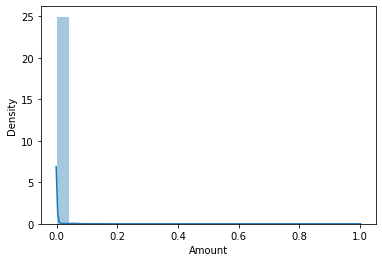

In [8]:
sns.distplot(data_no_desc.Amount, bins=25)

In [9]:
data_no_desc.Amount.describe()

count    4.760990e+05
mean     2.539438e-04
std      8.612140e-03
min      0.000000e+00
25%      6.927065e-08
50%      6.980627e-08
75%      8.198811e-08
max      1.000000e+00
Name: Amount, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score

linear = LinearRegression()
lass = Lasso()
ensemb = RandomForestRegressor()
decision = DecisionTreeRegressor()
neigh = KNeighborsRegressor()

models = [linear, lass, ensemb, decision, neigh]

In [11]:
X = data_no_desc.drop(['Amount'],axis=1)
y = data_no_desc.Amount

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.75)

In [12]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{model}: {r2_score(y_test, y_pred)} {mean_absolute_error(y_test, y_pred)}')

LinearRegression(): 0.0030060414198060936 0.0006633378813542378
Lasso(): -1.377559535331585e-07 0.0004988136823202352
RandomForestRegressor(): 0.8603257295685549 6.855807253405005e-05
DecisionTreeRegressor(): 0.7895620867266039 8.016337141852652e-05
KNeighborsRegressor(): 0.4259130489857297 0.0001963611041795698


In [13]:
import pickle
pickle.dump(decision, open('decisiontree.pkl', 'wb'))